In [1]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
from glob import glob

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
# figure를 위한 라이브러리
import matplotlib as mpl

In [5]:
# 글자체 설정
mpl.rcParams['font.family']='Arial'
mpl.rcParams['font.size']=30

In [6]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [7]:
def plot_variance(pca, width=8, dpi=600):
    # Create figure
    # fig, axs = plt.subplots(1, 1)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    plt.figure(figsize=(10,8),dpi=600)
    plt.bar(grid, evr,color='steelblue')
    plt.xlabel("Component")
    plt.title("% Explained Variance")
    plt.ylim(0.0, 1.0)
    
    plt.tick_params(direction='in')
    # # Cumulative Variance
    # cv = np.cumsum(evr)
    # axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    # axs[1].set(
    #     xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    # )
    # Set up figure
    # plt.figure(figsize=(10,8),dpi=600)
    plt.show()
    # plt.savefig('/content/drive/MyDrive//빅콘테스트 2022/plot variance.png',dpi=600)

# 전처리를 위해 데이터를 불러오기(생략가능)

In [9]:
df = pd.read_csv('/content/drive/MyDrive/빅콘테스트 2022/data/train_complete_10퍼.csv') # train 용
# df = pd.read_csv('/content/drive/MyDrive/빅콘테스트 2022/data/test_complete_5퍼.csv') # TEST 용

In [10]:
df

Unnamed: 0  application_id loanapply_insert_time  product_id  \
0                0         2157865   2022-05-09 08:44:59         235   
1                1          949973   2022-05-09 09:34:30         196   
2                2          949973   2022-05-09 09:34:47          75   
3                3          949973   2022-05-09 09:34:47          39   
4                4          949973   2022-05-09 09:34:28         123   
...            ...             ...                   ...         ...   
992136      992136         2039835   2022-05-16 17:53:02         113   
992137      992137         2039835   2022-05-16 17:53:26          75   
992138      992138          135008   2022-05-16 13:19:53          29   
992139      992139         1969227   2022-05-16 14:42:58           7   
992140      992140         1969227   2022-05-16 14:43:18         100   

        loan_limit  loan_rate  is_applied   user_id gender  credit_score  ...  \
0           2000.0       16.5         1.0  346970.0    man         540.0  ...   
1            300.0       12.5         0.0   17957.0  woman         630.0  ...   
2           1700.0        9.3         0.0   17957.0  woman         630.0  ...   
3            100.0       15.8         0.0   17957.0  woman         630.0  ...   
4            900.0       17.5         0.0   17957.0  woman         630.0  ...   
...            ...        ...         ...       ...    ...           ...  ...   
992136       500.0       19.5         0.0  660294.0  woman         660.0  ...   
992137      1800.0        9.2         0.0  660294.0  woman         660.0  ...   
992138       400.0       18.3         0.0  866920.0    man         660.0  ...   
992139      3000.0       13.6         0.0  109899.0    man         600.0  ...   
992140       400.0       15.3         0.0  109899.0    man         600.0  ...   

        sign_month user_interest sign_up market rates     bitcoin     gold  \
0         unsigned       16500.0       0        3.062  30,296.95   76,550    
1                4       62500.0       1        3.062  30,296.95   76,550    
2                4       46500.0       1        3.062  30,296.95   76,550    
3                4       79000.0       1        3.062  30,296.95   76,550    
4                4       87500.0       1        3.062  30,296.95   76,550    
...            ...           ...     ...          ...         ...      ...   
992136    unsigned       19500.0       0        3.046  29,862.92   74,630    
992137    unsigned        9200.0       0        3.046  29,862.92   74,630    
992138    unsigned        1830.0       0        3.046  29,862.92   74,630    
992139    unsigned       27200.0       0        3.046  29,862.92   74,630    
992140    unsigned       30600.0       0        3.046  29,862.92   74,630    

        dollar       s&p     kospi  time division  
0       1272.7  3,991.24  2,610.81        morning  
1       1272.7  3,991.24  2,610.81        morning  
2       1272.7  3,991.24  2,610.81        morning  
3       1272.7  3,991.24  2,610.81        morning  
4       1272.7  3,991.24  2,610.81        morning  
...        ...       ...       ...            ...  
992136  1286.0  4,008.01  2,596.58           noon  
992137  1286.0  4,008.01  2,596.58           noon  
992138  1286.0  4,008.01  2,596.58           noon  
992139  1286.0  4,008.01  2,596.58           noon  
992140  1286.0  4,008.01  2,596.58           noon  

[992141 rows x 41 columns]

In [11]:
df['loanapply_insert_time']=pd.to_datetime(df['loanapply_insert_time'])

In [12]:
df['loanapply_insert_time'].dt.date

0         2022-05-09
1         2022-05-09
2         2022-05-09
3         2022-05-09
4         2022-05-09
             ...    
992136    2022-05-16
992137    2022-05-16
992138    2022-05-16
992139    2022-05-16
992140    2022-05-16
Name: loanapply_insert_time, Length: 992141, dtype: object

In [13]:
df['sign_month'].value_counts()

unsigned    950132
4            14742
3            14686
5            12581
Name: sign_month, dtype: int64

In [14]:
df.columns

Index(['Unnamed: 0', 'application_id', 'loanapply_insert_time', 'product_id',
       'loan_limit', 'loan_rate', 'is_applied', 'user_id', 'gender',
       'credit_score', 'yearly_income', 'income_type', 'employment_type',
       'houseown_type', 'desired_amount', 'purpose', 'existing_loan_cnt',
       'existing_loan_amt', 'user_age', 'working month', 'personal_rehab',
       'cb_day', 'start_freq', 'intro_freq', 'end_freq', 'lm_freq',
       'pcal_freq', 'login_freq', 'idcert_freq', 'dcal_freq', 'getcr_freq',
       'sign_month', 'user_interest', 'sign_up', 'market rates', 'bitcoin',
       'gold', 'dollar', 's&p', 'kospi', 'time division'],
      dtype='object')

In [15]:
df = df.iloc[:,1:] # 인덱스 제거

In [16]:
df.isnull().sum()

application_id           0
loanapply_insert_time    0
product_id               0
loan_limit               0
loan_rate                0
is_applied               0
user_id                  0
gender                   0
credit_score             0
yearly_income            0
income_type              0
employment_type          0
houseown_type            0
desired_amount           0
purpose                  0
existing_loan_cnt        0
existing_loan_amt        0
user_age                 0
working month            0
personal_rehab           0
cb_day                   0
start_freq               0
intro_freq               0
end_freq                 0
lm_freq                  0
pcal_freq                0
login_freq               0
idcert_freq              0
dcal_freq                0
getcr_freq               0
sign_month               0
user_interest            0
sign_up                  0
market rates             0
bitcoin                  0
gold                     0
dollar                   0
s

In [17]:
df.iloc[:,21:]

start_freq  intro_freq  end_freq   lm_freq  pcal_freq  login_freq  \
0         1.423654    1.545823  1.600891  1.545823        0.0    1.659356   
1         2.089448    2.089448  1.527159  3.442902        0.0    4.183195   
2         2.089448    2.089448  1.527159  3.442902        0.0    4.183195   
3         2.089448    2.089448  1.527159  3.442902        0.0    4.183195   
4         2.089448    2.089448  1.527159  3.442902        0.0    4.183195   
...            ...         ...       ...       ...        ...         ...   
992136    2.099312    1.811873  1.366573  0.801784        0.0    0.000000   
992137    2.099312    1.811873  1.366573  0.801784        0.0    0.000000   
992138    2.000000    2.000000  0.000000  0.000000        0.0    0.000000   
992139    2.917404    3.330230  2.380283  0.858013        0.0    3.992420   
992140    2.917404    3.330230  2.380283  0.858013        0.0    3.992420   

        idcert_freq  dcal_freq  getcr_freq sign_month  user_interest  sign_up  \
0          1.545823        0.0    1.895058   unsigned        16500.0        0   
1          1.846913        0.0    4.934312          4        62500.0        1   
2          1.846913        0.0    4.934312          4        46500.0        1   
3          1.846913        0.0    4.934312          4        79000.0        1   
4          1.846913        0.0    4.934312          4        87500.0        1   
...             ...        ...         ...        ...            ...      ...   
992136     1.811873        0.0    0.801784   unsigned        19500.0        0   
992137     1.811873        0.0    0.801784   unsigned         9200.0        0   
992138     1.000000        0.0    0.000000   unsigned         1830.0        0   
992139     2.972217        0.0    1.233257   unsigned        27200.0        0   
992140     2.972217        0.0    1.233257   unsigned        30600.0        0   

        market rates     bitcoin     gold  dollar       s&p     kospi  \
0              3.062  30,296.95   76,550   1272.7  3,991.24  2,610.81   
1              3.062  30,296.95   76,550   1272.7  3,991.24  2,610.81   
2              3.062  30,296.95   76,550   1272.7  3,991.24  2,610.81   
3              3.062  30,296.95   76,550   1272.7  3,991.24  2,610.81   
4              3.062  30,296.95   76,550   1272.7  3,991.24  2,610.81   
...              ...         ...      ...     ...       ...       ...   
992136         3.046  29,862.92   74,630   1286.0  4,008.01  2,596.58   
992137         3.046  29,862.92   74,630   1286.0  4,008.01  2,596.58   
992138         3.046  29,862.92   74,630   1286.0  4,008.01  2,596.58   
992139         3.046  29,862.92   74,630   1286.0  4,008.01  2,596.58   
992140         3.046  29,862.92   74,630   1286.0  4,008.01  2,596.58   

       time division  
0            morning  
1            morning  
2            morning  
3            morning  
4            morning  
...              ...  
992136          noon  
992137          noon  
992138          noon  
992139          noon  
992140          noon  

[992141 rows x 19 columns]

In [18]:
# 인덱스 str으로 변경경
df['application_id'] = df['application_id'].astype(str)

# df['bank_id'] = df['bank_id'].astype(str)

df['product_id'] = df['product_id'].astype(str)

df['user_id']= df['user_id'].astype(str)

# 추가변수 eda

In [ ]:
num_list = [2, 3, 5, 6, 7, 9, 11, 13, 14, 15, 17, 22, 23, 24, 25, 26,28, 29]
temp = x_train.iloc[:,num_list]
temp

In [ ]:
num_lst2 = [4,5,6,9,10,14,16,17,18,19,22,23]
temp2 = df.iloc[:,num_lst2]
temp2

In [ ]:
# heatmap 그리기 -> 다중공선성 아예 안 뜨네
cmap = sns.light_palette("darkgray", as_cmap=True)
plt.figure(dpi=300, figsize=(12, 8))
sns.heatmap(temp2.corr(), annot=True, cmap=cmap)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif 비교 -> 10이상인 칼럼이 있다면 따로 전처리 필요
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    temp.values, i) for i in range(temp2.shape[1])]
vif["features"] = temp2.columns
vif

In [ ]:
data1 = df.loc[df['is_applied']==1]['start_freq']
data0 = df.loc[df['is_applied']==0]['start_freq']
plt.title('start_freq')
plt.hist(data0,label='non applied')
plt.hist(data1,label='applied')
plt.legend()

In [ ]:
data1 = df.loc[df['is_applied']==1]['intro_freq']
data0 = df.loc[df['is_applied']==0]['intro_freq']
plt.title('intro_freq')
plt.hist(data0,label='non applied')
plt.hist(data1,label='applied')
plt.legend()

In [ ]:
data1 = df.loc[df['is_applied']==1]['end_freq']
data0 = df.loc[df['is_applied']==0]['end_freq']
plt.title('end_freq')
plt.hist(data0,label='non applied')
plt.hist(data1,label='applied')
plt.legend()

In [ ]:
data1 = df.loc[df['is_applied']==1]['uselm_freq']
data0 = df.loc[df['is_applied']==0]['uselm_freq']
plt.title('uselm_freq')
plt.hist(data0,label='non applied')
plt.hist(data1,label='applied')
plt.legend()

In [ ]:
data1 = df.loc[df['is_applied']==1]['usepcal_freq']
data0 = df.loc[df['is_applied']==0]['usepcal_freq']
plt.title('usepcal_freq')
# plt.hist(data0,label='non applied')
plt.hist(data1,label='applied')
plt.legend()

In [ ]:
df.columns

In [ ]:
len(df.loc[df['existing_loan_cnt']>0])

In [ ]:
data1 = df.loc[df['existing_loan_cnt']>1]['is_applied']
data0 = df.loc[df['existing_loan_cnt']==0]['is_applied']
# plt.title('usepcal_freq')
plt.hist(data1,label='existing_loan')
plt.hist(data0,label='non_existing_loan')
plt.legend()

In [ ]:
data1.value_counts()/len(data1)

In [ ]:
data0.value_counts()/len(data0)

사실상 기대출 여부에 따라 대출 신청 여부 차이는 그닥 크지 않다



# 이상치 처리
성능이 오히려 안좋아져서 처리하지 않고 모델링 진행

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
lof = LocalOutlierFactor()

In [ ]:
from sklearn.model_selection import train_test_split
# eda를 분석하기 위해 train셀과 test셀로 나눔
data = df[df.columns.difference(['is_applied'])]
target = df['is_applied']

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target, random_state=1)

In [ ]:
x_train.info()

In [ ]:
# num_list = [2, 3, 5, 6, 7, 9, 11, 13, 14, 15, 17, 22, 23, 24, 25, 26,28, 29]
num_list = [2, 3, 5, 6, 7, 8, 12, 13, 19, 20, 21, 22] # pca 처리 후
temp = x_train.iloc[:,num_list]
temp

In [ ]:
temp['outlier'] = lof.fit_predict(temp)
temp['outlier'] = temp['outlier'].replace([-1,1],['outlier','inlier']) #Rename for legend purpose
print(temp.head()) 

In [ ]:
print("inlier 개수")
len(temp.loc[temp['outlier']=='inlier'])

In [ ]:
print("outlier 개수")
len(temp.loc[temp['outlier']=='outlier'])

In [ ]:
temp.loc[temp['outlier']=='outlier']

In [ ]:
outlier_lst = temp.loc[temp['outlier']=='outlier'].index.tolist()

In [ ]:
outlier_df = pd.DataFrame(outlier_lst)
outlier_df.columns = ['index']
outlier_df.to_csv('/content/drive/MyDrive/빅콘테스트 2022/data/outlier_lst_pca후.csv')

In [ ]:
# outlier_df = pd.read_csv('/content/drive/MyDrive/빅콘테스트 2022/data/outlier_lst.csv')
outlier_df = pd.read_csv('/content/drive/MyDrive/빅콘테스트 2022/data/outlier_lst_pca후.csv')

In [ ]:
outlier_df = outlier_df.iloc[:,1:]
outlier_lst = outlier_df['index'].tolist()

In [ ]:
outlier_data = x_train.loc[x_train.index.isin(outlier_lst)==True]

In [ ]:
outlier_lst.index(12277520)

In [ ]:
x_train = x_train.loc[x_train.index.isin(outlier_lst)==False]

In [ ]:
y_train = y_train.loc[y_train.index.isin(outlier_lst)==False]

In [ ]:
x_train.shape

In [ ]:
y_train.shape

# pca 진행

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255482 entries, 0 to 3255481
Data columns (total 39 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   application_id         object        
 1   loanapply_insert_time  datetime64[ns]
 2   product_id             object        
 3   loan_limit             float64       
 4   loan_rate              float64       
 5   is_applied             float64       
 6   user_id                object        
 7   gender                 object        
 8   credit_score           float64       
 9   yearly_income          float64       
 10  income_type            object        
 11  employment_type        object        
 12  houseown_type          object        
 13  desired_amount         float64       
 14  purpose                object        
 15  existing_loan_cnt      float64       
 16  existing_loan_amt      float64       
 17  user_age               float64       
 18  working month         

In [ ]:
# freq_df = df.iloc[:,[21,22,23,27]] # 대출신청하는 데 필요한 로그 정보만 pca 진행(train 버전)
freq_df = df.iloc[:,[20,21,22,26]] # 대출신청하는 데 필요한 로그 정보만 pca 진행(test 버전)

In [ ]:
# from sklearn.decomposition import PCA

# Create principal components
# pca_log = PCA()
# pca_log.fit(freq_df)
X_pca = pca_log.transform(freq_df)
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca

PC1       PC2       PC3       PC4
0        7.108955 -1.092569  3.652193 -0.337524
1        7.108955 -1.092569  3.652193 -0.337524
2        7.108955 -1.092569  3.652193 -0.337524
3        7.108955 -1.092569  3.652193 -0.337524
4        7.108955 -1.092569  3.652193 -0.337524
...           ...       ...       ...       ...
3255477 -0.770792 -0.368217 -0.696269 -0.291425
3255478 -0.770792 -0.368217 -0.696269 -0.291425
3255479 -0.770792 -0.368217 -0.696269 -0.291425
3255480 -0.770792 -0.368217 -0.696269 -0.291425
3255481 -0.770792 -0.368217 -0.696269 -0.291425

[3255482 rows x 4 columns]

In [ ]:
loadings = pd.DataFrame(
    pca_log.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=freq_df.columns,  # and the rows are the original features
)
loadings

PC1       PC2       PC3       PC4
start_freq   0.492144 -0.736013  0.451934 -0.108785
intro_freq   0.366991 -0.274696 -0.722394  0.517693
end_freq     0.734271  0.617890  0.241392  0.144181
idcert_freq  0.289756  0.032223 -0.464362 -0.836284

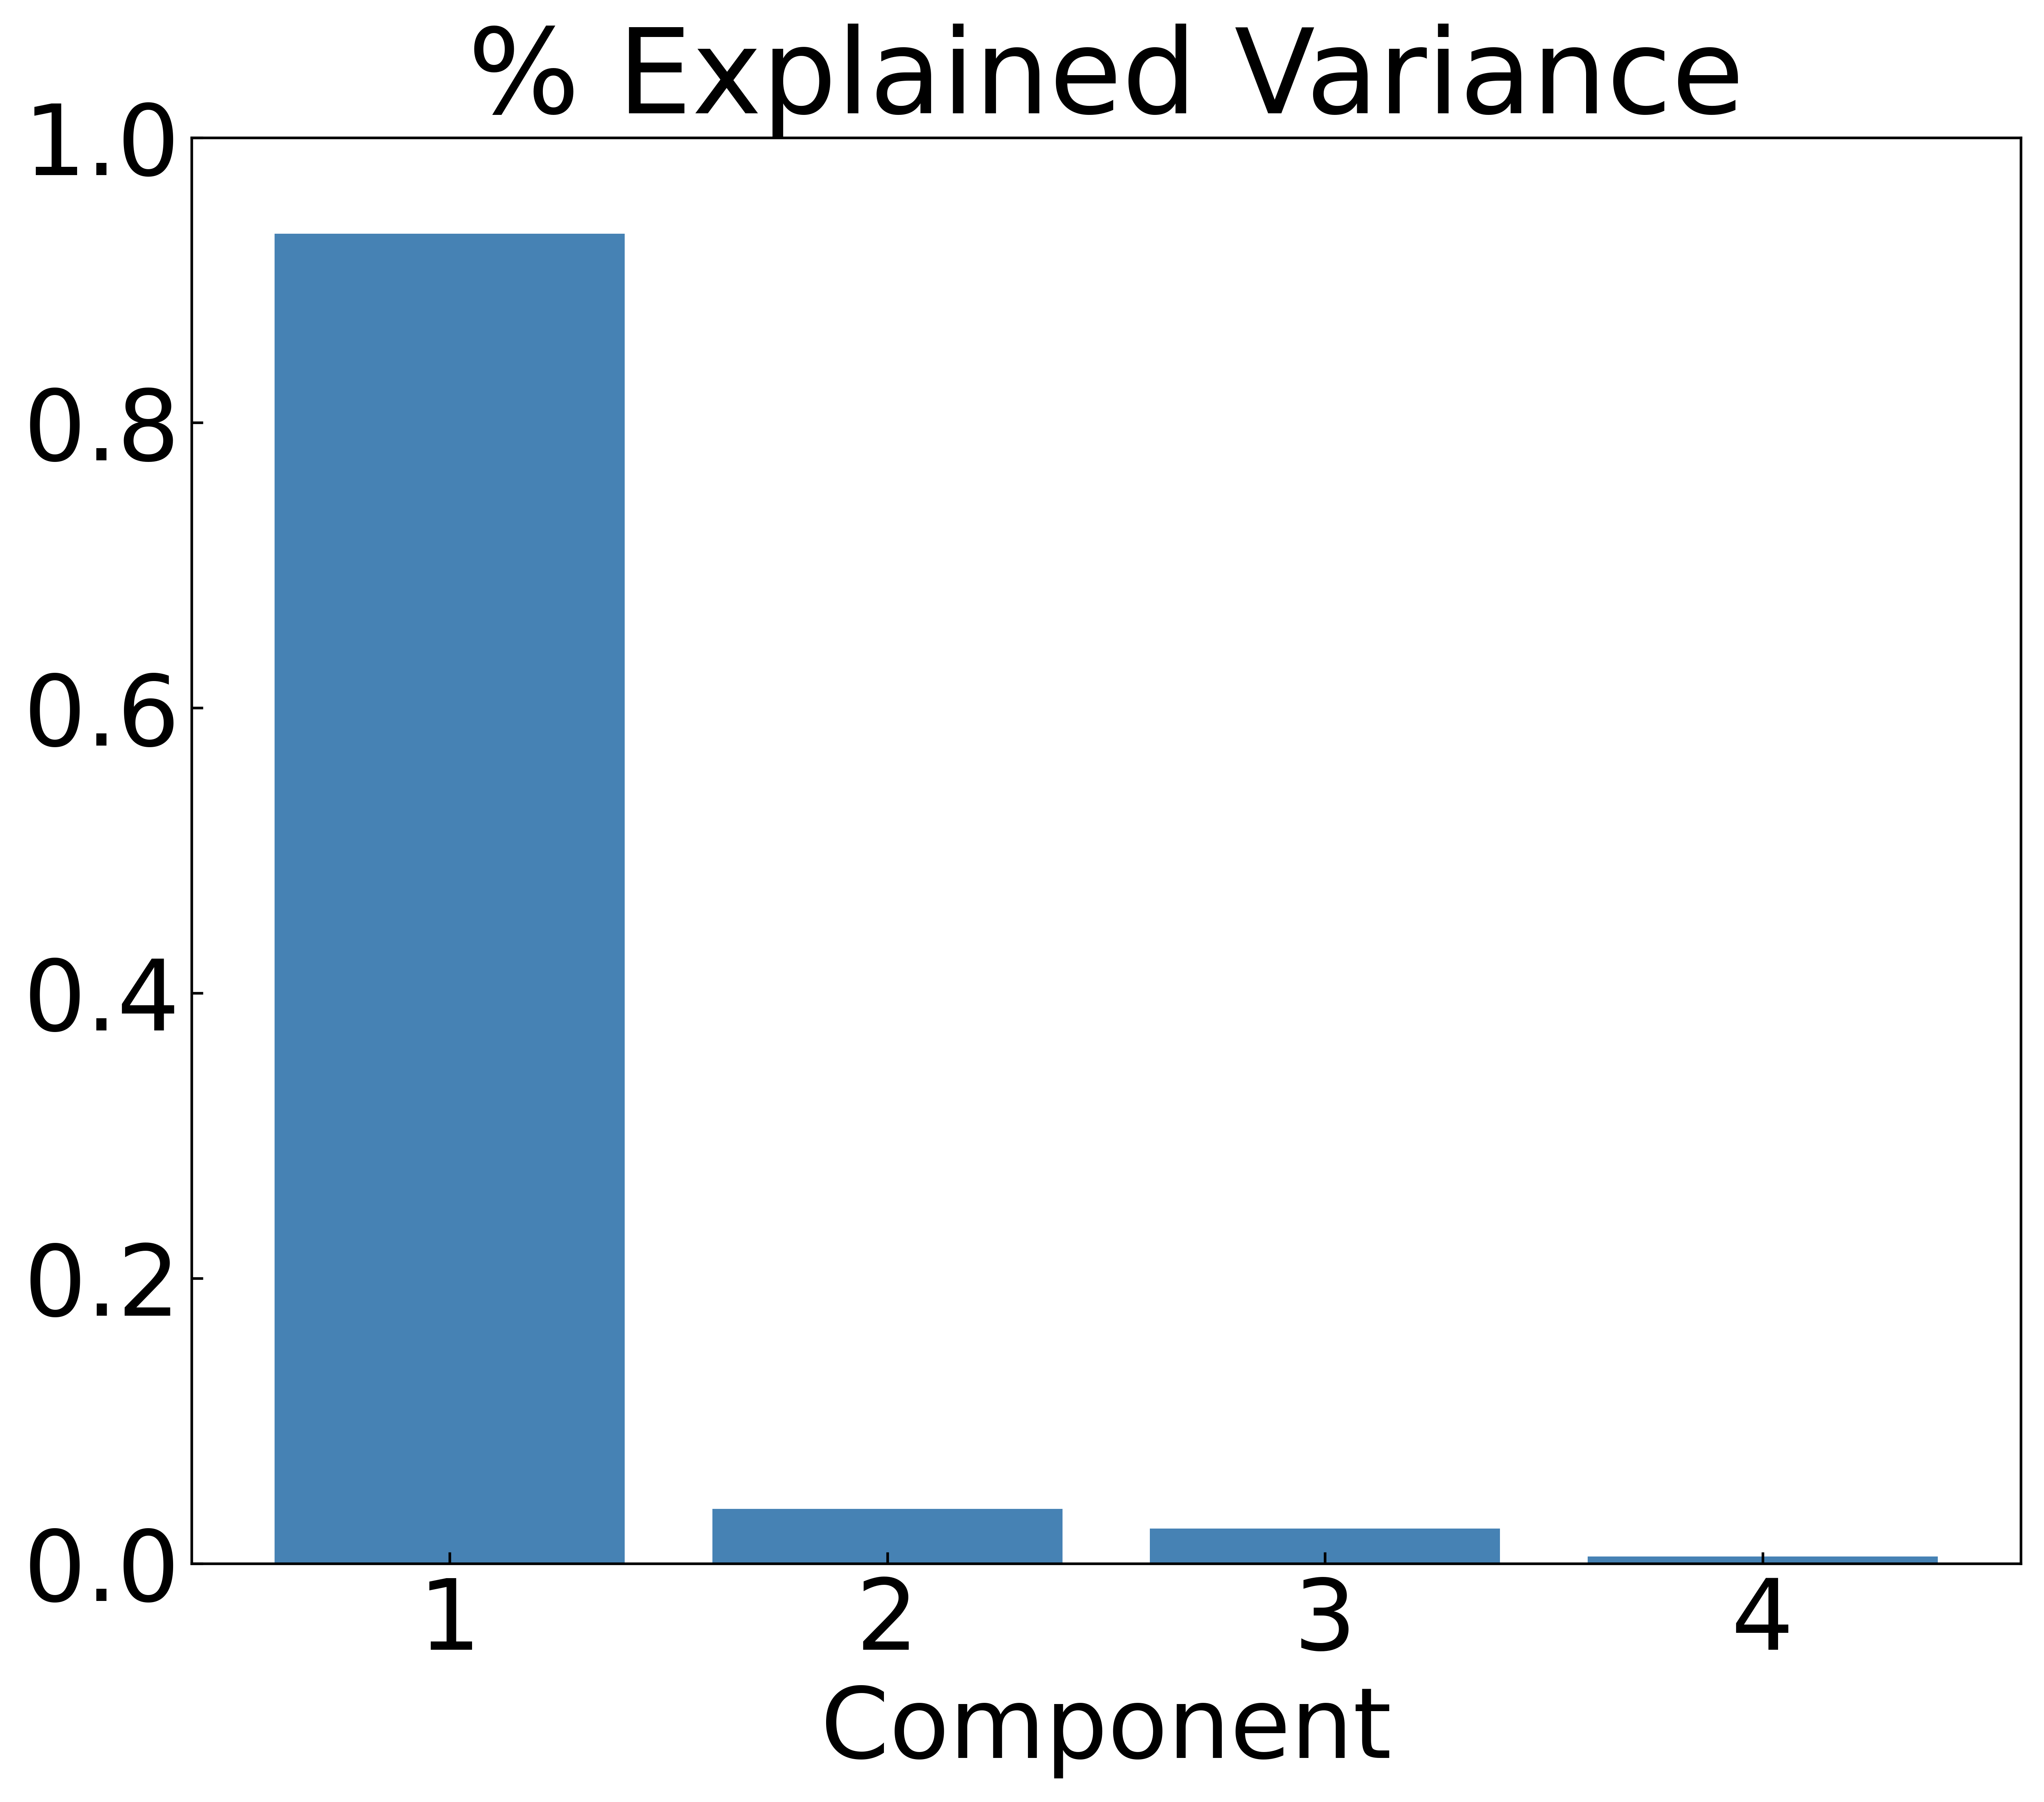

In [ ]:
plot_variance(pca_log)
# 한개로 4개의 정보가 대다수로 설명이 됨

In [ ]:
X_pca = pd.DataFrame(X_pca, columns=component_names)

In [ ]:
df['log_apply']=X_pca['PC1']

In [ ]:
df.pop('start_freq')
df.pop('intro_freq')
df.pop('end_freq')
# df.pop('uselm_freq')
# df.pop('usepcal_freq')
# df.pop('login_freq')
df.pop('idcert_freq')
# df.pop('usedcal_freq')
# df.pop('getcr_freq')

0          2.387623
1          2.387623
2          2.387623
3          2.387623
4          2.387623
             ...   
3255477    2.108465
3255478    2.108465
3255479    2.108465
3255480    2.108465
3255481    2.108465
Name: idcert_freq, Length: 3255482, dtype: float64

# 경제 변수도 pca 진행

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255482 entries, 0 to 3255481
Data columns (total 36 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   application_id         object        
 1   loanapply_insert_time  datetime64[ns]
 2   product_id             object        
 3   loan_limit             float64       
 4   loan_rate              float64       
 5   is_applied             float64       
 6   user_id                object        
 7   gender                 object        
 8   credit_score           float64       
 9   yearly_income          float64       
 10  income_type            object        
 11  employment_type        object        
 12  houseown_type          object        
 13  desired_amount         float64       
 14  purpose                object        
 15  existing_loan_cnt      float64       
 16  existing_loan_amt      float64       
 17  user_age               float64       
 18  working month         

In [ ]:
# 경제 변수 추가 전처리
df['bitcoin'] =df['bitcoin'].str.strip()
df['gold']=df['gold'].str.strip()
df['kospi']=df['kospi'].str.strip()
df['s&p']=df['s&p'].str.strip()

In [ ]:
df['bitcoin'] = df['bitcoin'].str.replace("," ,"")
df['gold']=df['gold'].str.replace("," ,"")
df['kospi']=df['kospi'].str.replace("," ,"")
df['s&p']=df['s&p'].str.replace("," ,"")

In [ ]:
df['bitcoin']=df['bitcoin'].astype(float)
df['gold']=df['gold'].astype(float)
df['kospi']=df['kospi'].astype(float)
df['s&p']=df['s&p'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255482 entries, 0 to 3255481
Data columns (total 36 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   application_id         object        
 1   loanapply_insert_time  datetime64[ns]
 2   product_id             object        
 3   loan_limit             float64       
 4   loan_rate              float64       
 5   is_applied             float64       
 6   user_id                object        
 7   gender                 object        
 8   credit_score           float64       
 9   yearly_income          float64       
 10  income_type            object        
 11  employment_type        object        
 12  houseown_type          object        
 13  desired_amount         float64       
 14  purpose                object        
 15  existing_loan_cnt      float64       
 16  existing_loan_amt      float64       
 17  user_age               float64       
 18  working month         

In [ ]:
# economy_df = df.iloc[:,29:34] #train 
economy_df = df.iloc[:,28:33] # test
economy_col = economy_df.columns.tolist()

In [ ]:
economy_df

market rates   bitcoin     gold  dollar      s&p
0               3.232  31155.48  74400.0  1241.1  4160.68
1               3.232  31155.48  74400.0  1241.1  4160.68
2               3.232  31155.48  74400.0  1241.1  4160.68
3               3.232  31155.48  74400.0  1241.1  4160.68
4               3.232  31155.48  74400.0  1241.1  4160.68
...               ...       ...      ...     ...      ...
3255477         3.121  29704.39  74390.0  1251.2  4108.54
3255478         3.121  29704.39  74390.0  1251.2  4108.54
3255479         3.121  29704.39  74390.0  1251.2  4108.54
3255480         3.121  29704.39  74390.0  1251.2  4108.54
3255481         3.121  29704.39  74390.0  1251.2  4108.54

[3255482 rows x 5 columns]

In [ ]:
# pca는 스케일에 예민하므로 미리 정규화를 취해주었다.
from sklearn.preprocessing import MinMaxScaler

# minmax_scaler = MinMaxScaler() # train
# economy_df = minmax_scaler.fit_transform(economy_df) # train
economy_df = minmax_scaler.transform(economy_df) # test 

In [ ]:
economy_df = pd.DataFrame(economy_df)
economy_df.columns = economy_col
economy_df

market rates   bitcoin      gold    dollar       s&p
0            1.046046  0.134191  0.123596  0.458781  0.355619
1            1.046046  0.134191  0.123596  0.458781  0.355619
2            1.046046  0.134191  0.123596  0.458781  0.355619
3            1.046046  0.134191  0.123596  0.458781  0.355619
4            1.046046  0.134191  0.123596  0.458781  0.355619
...               ...       ...       ...       ...       ...
3255477      0.934935  0.057162  0.121348  0.579450  0.284274
3255478      0.934935  0.057162  0.121348  0.579450  0.284274
3255479      0.934935  0.057162  0.121348  0.579450  0.284274
3255480      0.934935  0.057162  0.121348  0.579450  0.284274
3255481      0.934935  0.057162  0.121348  0.579450  0.284274

[3255482 rows x 5 columns]

In [ ]:
from sklearn.decomposition import PCA

# Create principal components
# pca_eco = PCA()
# pca_eco.fit(economy_df)
X_pca = pca_eco.transform(economy_df)
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca

PC1       PC2       PC3       PC4       PC5
0        0.449708 -0.007377 -0.404365 -0.315834  0.029098
1        0.449708 -0.007377 -0.404365 -0.315834  0.029098
2        0.449708 -0.007377 -0.404365 -0.315834  0.029098
3        0.449708 -0.007377 -0.404365 -0.315834  0.029098
4        0.449708 -0.007377 -0.404365 -0.315834  0.029098
...           ...       ...       ...       ...       ...
3255477  0.550356 -0.127279 -0.319293 -0.241641  0.055310
3255478  0.550356 -0.127279 -0.319293 -0.241641  0.055310
3255479  0.550356 -0.127279 -0.319293 -0.241641  0.055310
3255480  0.550356 -0.127279 -0.319293 -0.241641  0.055310
3255481  0.550356 -0.127279 -0.319293 -0.241641  0.055310

[3255482 rows x 5 columns]

In [ ]:
loadings = pd.DataFrame(
    pca_eco.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=economy_df.columns,  # and the rows are the original features
)
loadings

PC1       PC2       PC3       PC4       PC5
market rates  0.389760  0.718051 -0.511417 -0.235595 -0.124249
bitcoin      -0.545585  0.261532 -0.118662  0.480863 -0.623400
gold         -0.014261  0.592698  0.798428 -0.005622  0.104818
dollar        0.550443 -0.004097 -0.001065  0.821237  0.150214
s&p          -0.497225  0.254355 -0.294760  0.196987  0.749923

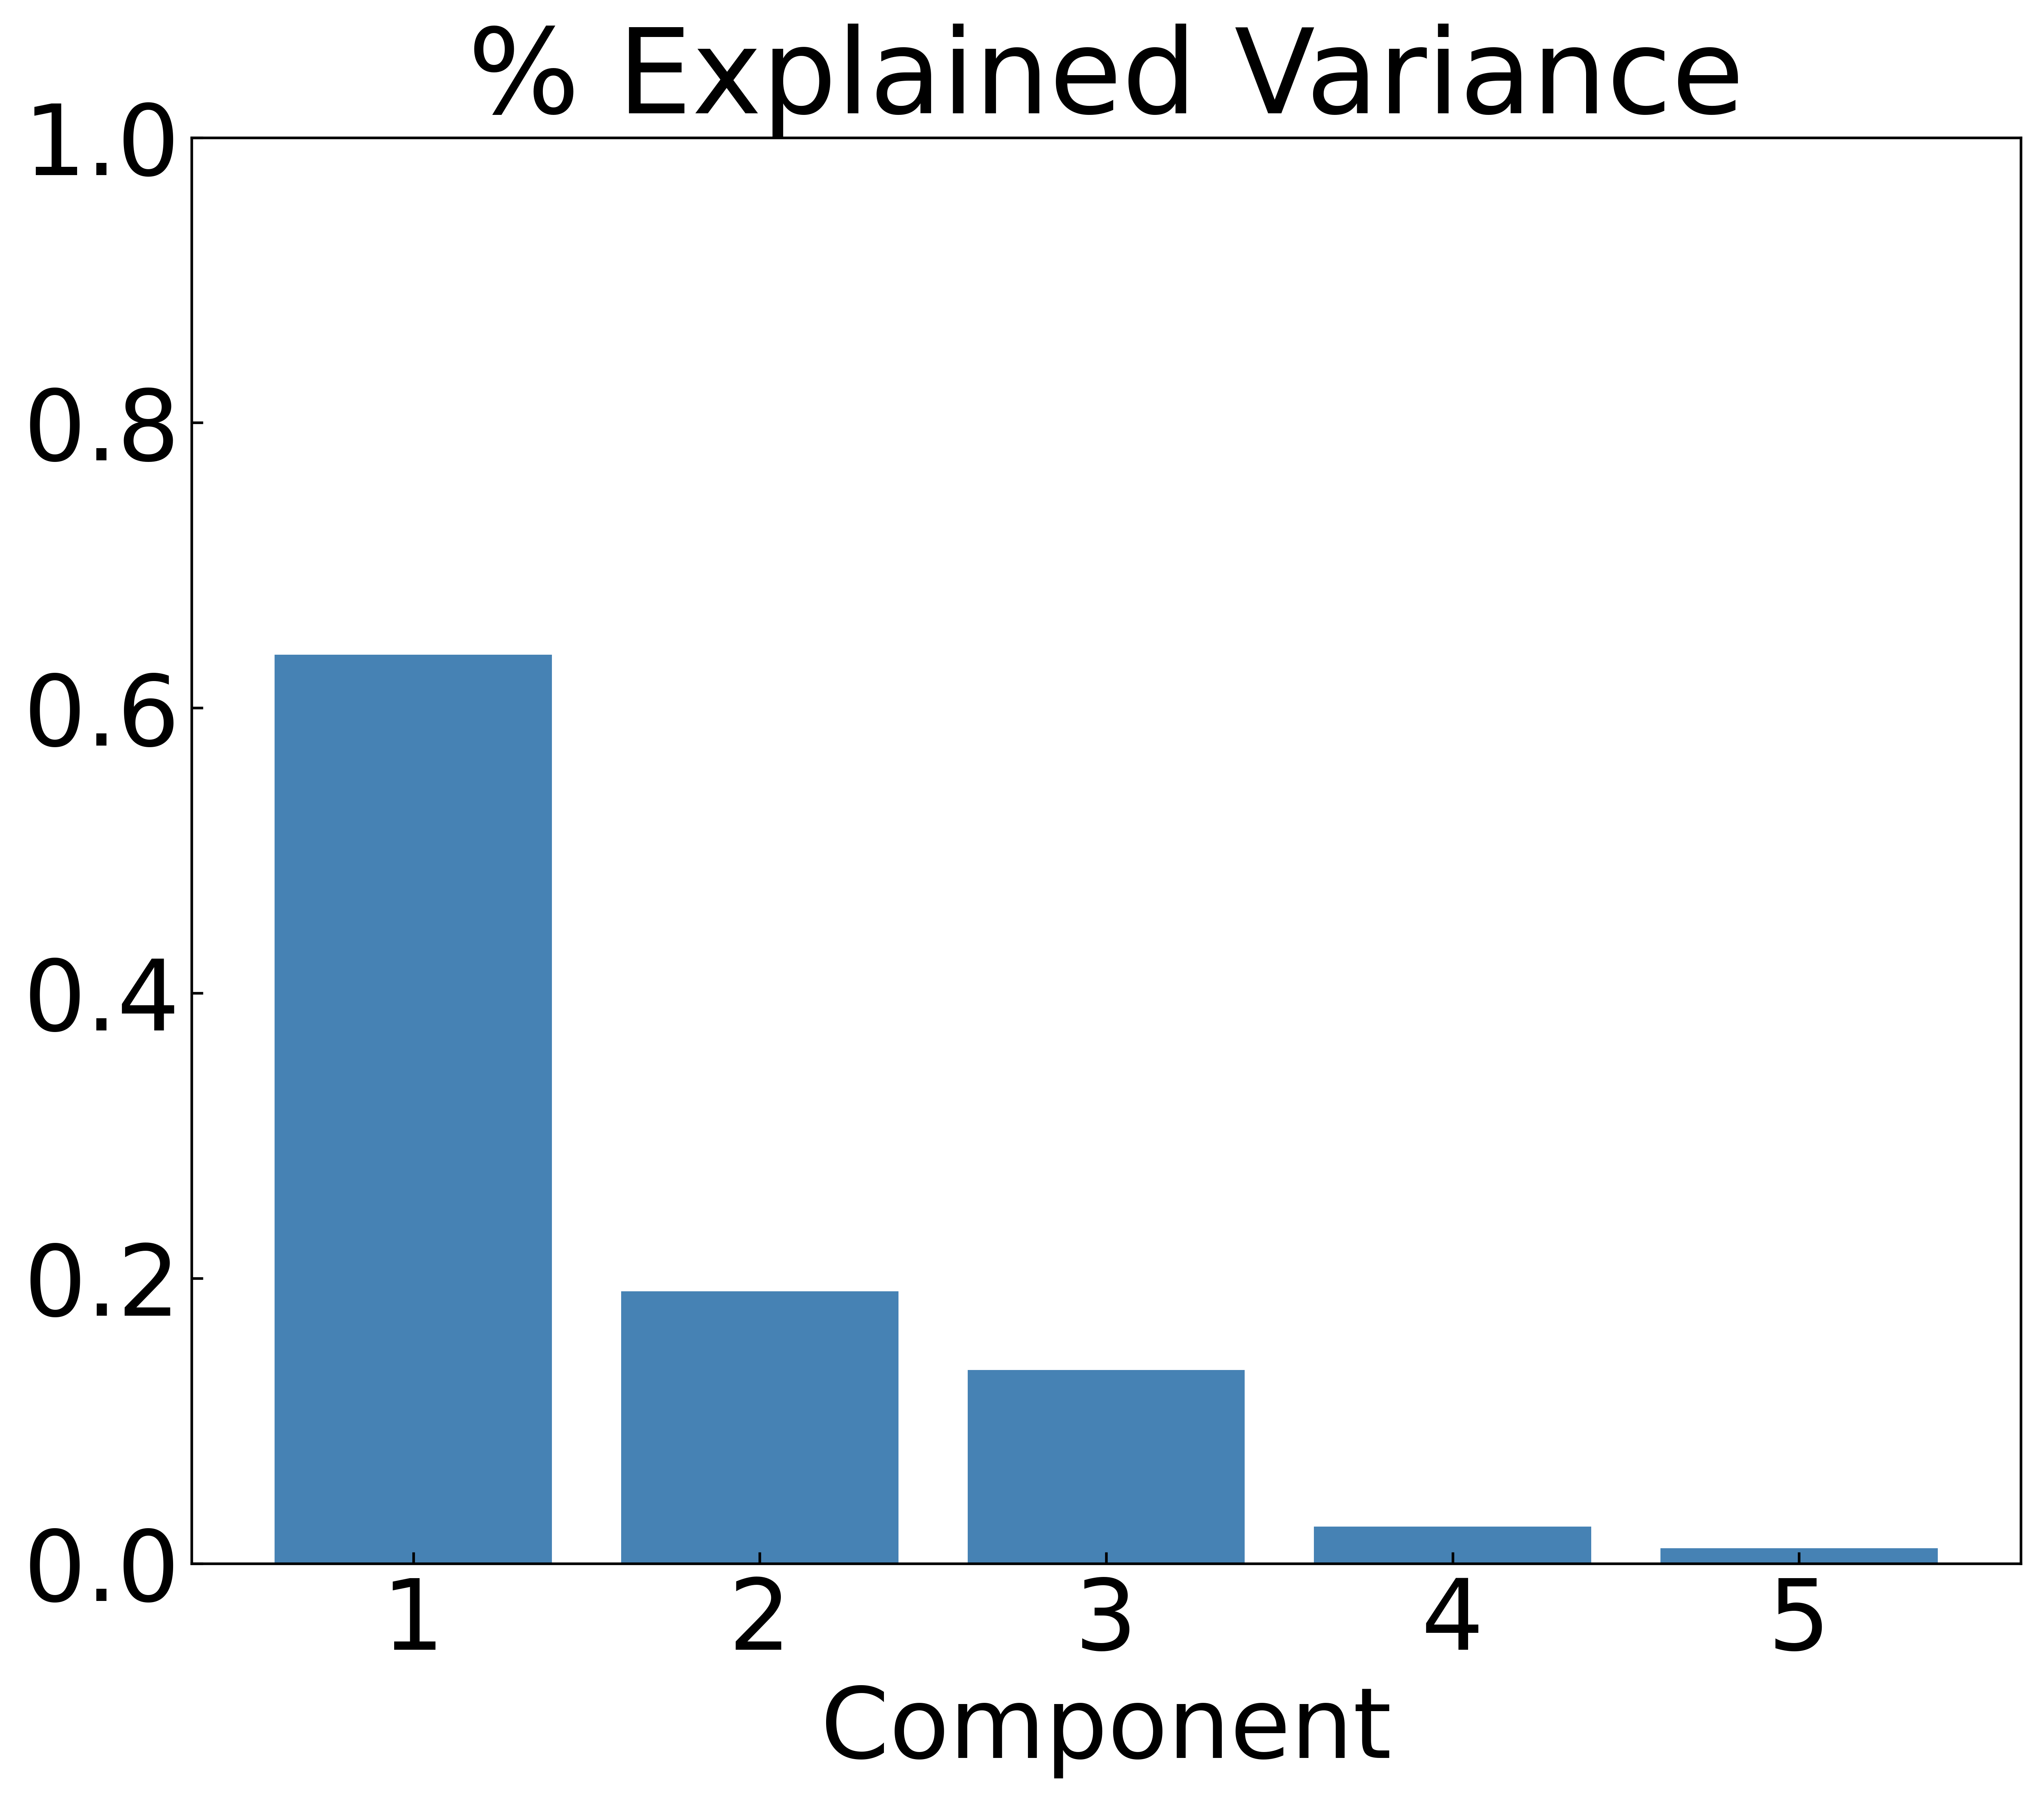

In [ ]:
plot_variance(pca_eco)
# 변수를 3개 사용하자

In [ ]:
X_pca = pd.DataFrame(X_pca, columns=component_names)

In [ ]:
df['economy1'] = X_pca['PC1']
df['economy2'] = X_pca['PC2']
df['economy3'] = X_pca['PC3']

In [ ]:
df.columns

Index(['application_id', 'loanapply_insert_time', 'product_id', 'loan_limit',
       'loan_rate', 'is_applied', 'user_id', 'gender', 'credit_score',
       'yearly_income', 'income_type', 'employment_type', 'houseown_type',
       'desired_amount', 'purpose', 'existing_loan_cnt', 'existing_loan_amt',
       'user_age', 'working month', 'personal_rehab', 'lm_freq', 'pcal_freq',
       'login_freq', 'getcr_freq', 'dcal_freq', 'sign_month', 'user_interest',
       'sign_up', 'market rates', 'bitcoin', 'gold', 'dollar', 's&p', 'kospi',
       'time division', 'log_apply', 'economy1', 'economy2', 'economy3'],
      dtype='object')

In [ ]:
df.pop('market rates')
df.pop('bitcoin')
df.pop('gold')
df.pop('dollar')
df.pop('s&p')
df.pop('kospi')

0          2626.34
1          2626.34
2          2626.34
3          2626.34
4          2626.34
            ...   
3255477    2670.65
3255478    2670.65
3255479    2670.65
3255480    2670.65
3255481    2670.65
Name: kospi, Length: 3255482, dtype: float64

In [ ]:
df.pop('application_id') # 신청 아이디 모델링에서 제거
df.pop('loanapply_insert_time') # 신청시간도 제거

0         2022-06-07 13:05:41
1         2022-06-07 13:05:41
2         2022-06-07 13:05:41
3         2022-06-07 13:05:41
4         2022-06-07 13:05:41
                  ...        
3255477   2022-06-03 12:02:00
3255478   2022-06-03 12:02:00
3255479   2022-06-03 12:01:59
3255480   2022-06-03 12:01:56
3255481   2022-06-03 12:01:58
Name: loanapply_insert_time, Length: 3255482, dtype: datetime64[ns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255482 entries, 0 to 3255481
Data columns (total 31 columns):
 #   Column             Dtype  
---  ------             -----  
 0   product_id         object 
 1   loan_limit         float64
 2   loan_rate          float64
 3   is_applied         float64
 4   user_id            object 
 5   gender             object 
 6   credit_score       float64
 7   yearly_income      float64
 8   income_type        object 
 9   employment_type    object 
 10  houseown_type      object 
 11  desired_amount     float64
 12  purpose            object 
 13  existing_loan_cnt  float64
 14  existing_loan_amt  float64
 15  user_age           float64
 16  working month      int64  
 17  personal_rehab     object 
 18  lm_freq            float64
 19  pcal_freq          float64
 20  login_freq         float64
 21  getcr_freq         float64
 22  dcal_freq          float64
 23  sign_month         object 
 24  user_interest      float64
 25  sign_up           

In [ ]:
# 모델용 데이터 저장
# df.to_csv('/content/drive/MyDrive/빅콘테스트 2022/data/model용 data_10퍼.csv',index=False)
df.to_csv('/content/drive/MyDrive/빅콘테스트 2022/data/test용 data.csv',index=False)

# 데이터 모델링

In [19]:
# 모델용 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/빅콘테스트 2022/data/model용 data.csv')
df

product_id  loan_limit  is_applied   user_id gender  credit_score  \
0              235      2000.0         1.0  346970.0    man         540.0   
1              196       300.0         0.0   17957.0  woman         630.0   
2               75      1700.0         0.0   17957.0  woman         630.0   
3               39       100.0         0.0   17957.0  woman         630.0   
4              123       900.0         0.0   17957.0  woman         630.0   
...            ...         ...         ...       ...    ...           ...   
498980           7      3000.0         0.0  109899.0    man         600.0   
498981         110       900.0         0.0  109899.0    man         600.0   
498982         142       300.0         0.0  109899.0    man         600.0   
498983         100       400.0         0.0  109899.0    man         600.0   
498984         231       900.0         0.0  109899.0    man         600.0   

        yearly_income   income_type employment_type houseown_type  ...  \
0              3200.0  EARNEDINCOME             정규직            자가  ...   
1              2900.0  EARNEDINCOME             정규직           전월세  ...   
2              2900.0  EARNEDINCOME             정규직           전월세  ...   
3              2900.0  EARNEDINCOME             정규직           전월세  ...   
4              2900.0  EARNEDINCOME             정규직           전월세  ...   
...               ...           ...             ...           ...  ...   
498980         3700.0  EARNEDINCOME             정규직            자가  ...   
498981         3700.0  EARNEDINCOME             정규직            자가  ...   
498982         3700.0  EARNEDINCOME             정규직            자가  ...   
498983         3700.0  EARNEDINCOME             정규직            자가  ...   
498984         3700.0  EARNEDINCOME             정규직            자가  ...   

       usedcal_freq  getcr_freq  sign_month  user_interest  sign_up  \
0               0.0    1.895058    unsinged        16500.0        0   
1               0.0    4.934312           4        62500.0        1   
2               0.0    4.934312           4        46500.0        1   
3               0.0    4.934312           4        79000.0        1   
4               0.0    4.934312           4        87500.0        1   
...             ...         ...         ...            ...      ...   
498980          0.0    1.233257    unsinged        27200.0        0   
498981          0.0    1.233257    unsinged        28800.0        0   
498982          0.0    1.233257    unsinged        22400.0        0   
498983          0.0    1.233257    unsinged        30600.0        0   
498984          0.0    1.233257    unsinged        31000.0        0   

       time division  log_apply  economy1  economy2  economy3  
0            morning  -1.302581   0.78258  0.080206  0.143222  
1            morning  -0.689822   0.78258  0.080206  0.143222  
2            morning  -0.689822   0.78258  0.080206  0.143222  
3            morning  -0.689822   0.78258  0.080206  0.143222  
4            morning  -0.689822   0.78258  0.080206  0.143222  
...              ...        ...       ...       ...       ...  
498980          noon   1.121994   0.88805 -0.132720 -0.224576  
498981          noon   1.121994   0.88805 -0.132720 -0.224576  
498982          noon   1.121994   0.88805 -0.132720 -0.224576  
498983          noon   1.121994   0.88805 -0.132720 -0.224576  
498984          noon   1.121994   0.88805 -0.132720 -0.224576  

[498985 rows x 29 columns]

In [ ]:
# 테스트용 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/빅콘테스트 2022/data/test용 data.csv')
df

product_id  loan_limit  loan_rate  is_applied   user_id gender  \
0               191      4200.0       13.6         NaN  430982.0    man   
1               169      2400.0       17.9         NaN  430982.0    man   
2                 7      2400.0       18.5         NaN  430982.0    man   
3               268      2900.0       10.8         NaN  430982.0    man   
4               118       500.0       16.4         NaN  430982.0    man   
...             ...         ...        ...         ...       ...    ...   
3255477         187       100.0       10.0         NaN  478802.0    man   
3255478          38      2100.0       16.5         NaN  478802.0    man   
3255479         223      3400.0       17.3         NaN  478802.0    man   
3255480         129      1200.0       14.1         NaN  478802.0    man   
3255481         200       300.0       14.8         NaN  478802.0    man   

         credit_score  yearly_income   income_type employment_type  ...  \
0               620.0         2400.0  EARNEDINCOME             정규직  ...   
1               620.0         2400.0  EARNEDINCOME             정규직  ...   
2               620.0         2400.0  EARNEDINCOME             정규직  ...   
3               620.0         2400.0  EARNEDINCOME             정규직  ...   
4               620.0         2400.0  EARNEDINCOME             정규직  ...   
...               ...            ...           ...             ...  ...   
3255477         610.0         4500.0  EARNEDINCOME             정규직  ...   
3255478         610.0         4500.0  EARNEDINCOME             정규직  ...   
3255479         610.0         4500.0  EARNEDINCOME             정규직  ...   
3255480         610.0         4500.0  EARNEDINCOME             정규직  ...   
3255481         610.0         4500.0  EARNEDINCOME             정규직  ...   

        getcr_freq  dcal_freq sign_month  user_interest  sign_up  \
0         0.476417        0.0   unsigned        34000.0        0   
1         0.476417        0.0   unsigned        44750.0        0   
2         0.476417        0.0   unsigned        46250.0        0   
3         0.476417        0.0   unsigned        27000.0        0   
4         0.476417        0.0   unsigned        41000.0        0   
...            ...        ...        ...            ...      ...   
3255477   0.285242        0.0   unsigned        50000.0        0   
3255478   0.285242        0.0   unsigned        82500.0        0   
3255479   0.285242        0.0   unsigned        86500.0        0   
3255480   0.285242        0.0   unsigned        70500.0        0   
3255481   0.285242        0.0   unsigned        74000.0        0   

         time division  log_apply  economy1  economy2  economy3  
0                 noon   7.108955  0.449708 -0.007377 -0.404365  
1                 noon   7.108955  0.449708 -0.007377 -0.404365  
2                 noon   7.108955  0.449708 -0.007377 -0.404365  
3                 noon   7.108955  0.449708 -0.007377 -0.404365  
4                 noon   7.108955  0.449708 -0.007377 -0.404365  
...                ...        ...       ...       ...       ...  
3255477           noon  -0.770792  0.550356 -0.127279 -0.319293  
3255478           noon  -0.770792  0.550356 -0.127279 -0.319293  
3255479           noon  -0.770792  0.550356 -0.127279 -0.319293  
3255480           noon  -0.770792  0.550356 -0.127279 -0.319293  
3255481           noon  -0.770792  0.550356 -0.127279 -0.319293  

[3255482 rows x 31 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498985 entries, 0 to 498984
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   product_id         498985 non-null  int64  
 1   loan_limit         498985 non-null  float64
 2   is_applied         498985 non-null  float64
 3   user_id            498985 non-null  float64
 4   gender             498985 non-null  object 
 5   credit_score       498985 non-null  float64
 6   yearly_income      498985 non-null  float64
 7   income_type        498985 non-null  object 
 8   employment_type    498985 non-null  object 
 9   houseown_type      498985 non-null  object 
 10  purpose            498985 non-null  object 
 11  existing_loan_cnt  498985 non-null  float64
 12  existing_loan_amt  498985 non-null  float64
 13  user_age           498985 non-null  float64
 14  working month      498985 non-null  int64  
 15  personal_rehab     498985 non-null  object 
 16  us

In [21]:
# df.pop('cb_day') # 10퍼 데이터에서만 필요없는 변수 제거

In [22]:
# id 모두 문자열로 변경
df['product_id'] = df['product_id'].astype(str)
df['user_id'] = df['user_id'].astype(str)

In [23]:
from sklearn.model_selection import train_test_split
# eda를 분석하기 위해 train셀과 test셀로 나눔
data = df[df.columns.difference(['is_applied'])]
target = df['is_applied']

# train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target, random_state=1)

In [24]:
y_train.value_counts()/len(y_train)

0.0    0.945096
1.0    0.054904
Name: is_applied, dtype: float64

In [25]:
# catboost에 사용하기 위해 범주형 피처만 리스트화
cat_features = np.where((x_train.dtypes != np.float)&(x_train.dtypes != np.int))[0].tolist()

cat_features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


[4, 7, 9, 10, 14, 15, 16, 17, 19, 24]

In [26]:
!pip install catboost # catboost library install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 30 kB/s 


In [ ]:
# 가중치 계산
neg=y_train.value_counts()[0]
pos=y_train.value_counts()[1]
total=len(y_train)
print(neg)
print(pos)
print(total)

377271
21917
399188


In [ ]:
# # # total/2 단위로 확장하면 손실 규모도 비슷한 수준으로 유지할 수 있습니다.
# # # 모든 예제의 가중치 합계는 동일합니다.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

weights = {0: 1, 1: 10}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.53
Weight for class 1: 9.11


In [27]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
params = {'max_depth': [7,8,9]}

In [ ]:
clf = CatBoostClassifier(iterations=1000,learning_rate=0.2,random_seed=1,class_weights=weights)
# clf = CatBoostClassifier(iterations=299,learning_rate=0.25,random_seed=1) # 가중치 적용 X

In [ ]:
grid_search = GridSearchCV(clf, params, cv=2)

In [ ]:
grid_search.fit(x_train,y_train,cat_features=cat_features,eval_set=(x_test,y_test),early_stopping_rounds=10)

0:	learn: 0.6055244	test: 0.5984251	best: 0.5984251 (0)	total: 258ms	remaining: 4m 17s
1:	learn: 0.5456724	test: 0.5346402	best: 0.5346402 (1)	total: 578ms	remaining: 4m 48s
2:	learn: 0.5103264	test: 0.4975205	best: 0.4975205 (2)	total: 871ms	remaining: 4m 49s
3:	learn: 0.4838111	test: 0.4673717	best: 0.4673717 (3)	total: 1.13s	remaining: 4m 41s
4:	learn: 0.4689320	test: 0.4533558	best: 0.4533558 (4)	total: 1.39s	remaining: 4m 36s
5:	learn: 0.4572160	test: 0.4406823	best: 0.4406823 (5)	total: 1.71s	remaining: 4m 43s
6:	learn: 0.4487538	test: 0.4335318	best: 0.4335318 (6)	total: 2.02s	remaining: 4m 46s
7:	learn: 0.4429045	test: 0.4269554	best: 0.4269554 (7)	total: 2.27s	remaining: 4m 42s
8:	learn: 0.4379776	test: 0.4229841	best: 0.4229841 (8)	total: 2.61s	remaining: 4m 47s
9:	learn: 0.4331346	test: 0.4185294	best: 0.4185294 (9)	total: 2.87s	remaining: 4m 44s
10:	learn: 0.4291757	test: 0.4146527	best: 0.4146527 (10)	total: 3.23s	remaining: 4m 50s
11:	learn: 0.4269792	test: 0.4102301	best

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fd95b7dfb50>,
             param_grid={'max_depth': [7, 8, 9]})

In [ ]:
grid_search.best_params_

{'max_depth': 8}

In [ ]:
clf.save_model('/content/drive/MyDrive/빅콘테스트 2022/code/clf_model_10퍼.model')

# 여기서 부터 모델 불러오면 댐!


In [29]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier()
clf=clf.load_model('/content/drive/MyDrive/빅콘테스트 2022/code/clf_model.model')
# model=clf.load_model('/content/drive/MyDrive/공모전/빅콘테스트 2022/code/clf_model.model') #과눙버전

In [30]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.1 MB/s 


In [31]:
import shap
shap.initjs()

In [32]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(x_train)

In [33]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], x_train.iloc[0,:])
# plt.savefig('/content/drive/MyDrive/빅콘테스트 2022/code/force_plot.svg',dpi=600)

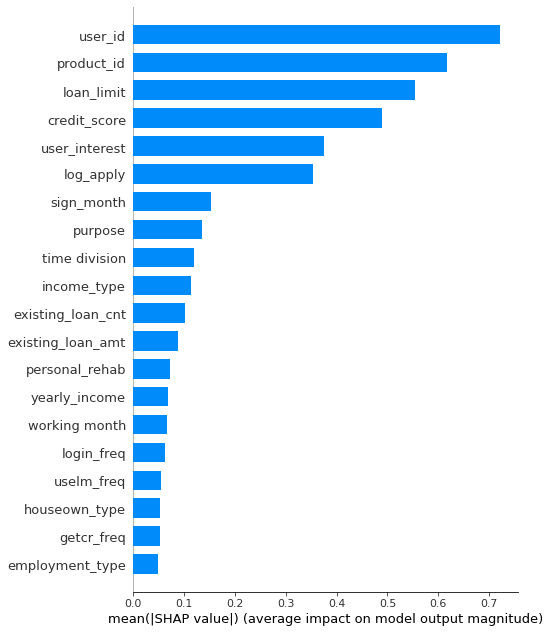

In [ ]:
shap.summary_plot(shap_values, x_train, plot_type="bar",show=False)
plt.savefig('/content/drive/MyDrive/빅콘테스트 2022/code/summary_barplot.png',dpi=600)

In [36]:
shap.initjs()
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))  # (13, ) : 각각의 Feature 에 대해 shap value 다 더한 것 

# make SHAP plots of the three most important features
for i in range(2):
    shap.dependence_plot(top_inds[i], shap_values, x_train)

TypeError: ignored

In [ ]:
shap.dependence_plot(top_inds[i], shap_values, x_train)

In [ ]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:1000], x_train[:1000])

In [ ]:
shap.plots.waterfall(shap_values)

AttributeError: ignored

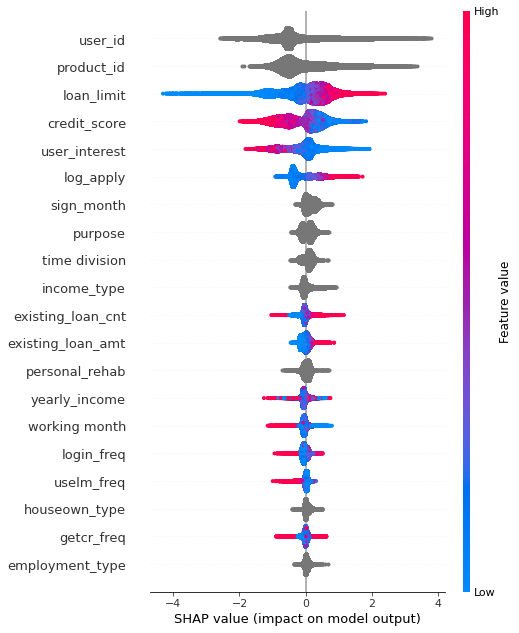

In [ ]:
shap.summary_plot(shap_values,x_train,show=False)
plt.savefig('/content/drive/MyDrive/빅콘테스트 2022/code/summary_plot.png',dpi=600)

In [ ]:
# y_pred 예측
y_pred = clf.predict(data=x_test)
# y_pred = grid_search.predict(x_test)

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9007384991532812

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1_score(y_test, y_pred) 

0.45529528208512043

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[168647,  18984],
       [  2347,   8451]])

In [ ]:
y_test

29483     0.0
369037    0.0
313239    0.0
338405    0.0
93533     0.0
         ... 
218421    0.0
179696    0.0
458825    0.0
1165      0.0
102178    1.0
Name: is_applied, Length: 99797, dtype: float64

In [ ]:
d = np.zeros(99797)
d.shape

(99797,)

In [ ]:
accuracy_score(y_test, d)

0.9450985500566149

In [ ]:
f1_score(y_test, d)

0.0

In [ ]:
y_test

29483     0.0
369037    0.0
313239    0.0
338405    0.0
93533     0.0
         ... 
218421    0.0
179696    0.0
458825    0.0
1165      0.0
102178    1.0
Name: is_applied, Length: 99797, dtype: float64

# test 결과 생성

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255482 entries, 0 to 3255481
Data columns (total 31 columns):
 #   Column             Dtype  
---  ------             -----  
 0   product_id         object 
 1   loan_limit         float64
 2   loan_rate          float64
 3   is_applied         float64
 4   user_id            object 
 5   gender             object 
 6   credit_score       float64
 7   yearly_income      float64
 8   income_type        object 
 9   employment_type    object 
 10  houseown_type      object 
 11  desired_amount     float64
 12  purpose            object 
 13  existing_loan_cnt  float64
 14  existing_loan_amt  float64
 15  user_age           float64
 16  working month      int64  
 17  personal_rehab     object 
 18  lm_freq            float64
 19  pcal_freq          float64
 20  login_freq         float64
 21  getcr_freq         float64
 22  dcal_freq          float64
 23  sign_month         object 
 24  user_interest      float64
 25  sign_up           

In [ ]:
df.pop('loan_rate')
df.pop('desired_amount')
df.pop('is_applied')

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
3255477   NaN
3255478   NaN
3255479   NaN
3255480   NaN
3255481   NaN
Name: is_applied, Length: 3255482, dtype: float64

In [ ]:
df.columns

Index(['product_id', 'loan_limit', 'user_id', 'gender', 'credit_score',
       'yearly_income', 'income_type', 'employment_type', 'houseown_type',
       'purpose', 'existing_loan_cnt', 'existing_loan_amt', 'user_age',
       'working month', 'personal_rehab', 'lm_freq', 'pcal_freq', 'login_freq',
       'getcr_freq', 'dcal_freq', 'sign_month', 'user_interest', 'sign_up',
       'time division', 'log_apply', 'economy1', 'economy2', 'economy3'],
      dtype='object')

In [ ]:
test=df[['credit_score','economy1','economy2','economy3','employment_type','existing_loan_amt','existing_loan_cnt',
       'gender','getcr_freq','houseown_type','income_type','loan_limit','log_apply','login_freq','personal_rehab',
       'product_id','purpose','sign_month','sign_up','time division','dcal_freq','lm_freq','pcal_freq','user_age',
       'user_id','user_interest','working month','yearly_income']]

In [ ]:
test.rename(columns={'dcal_freq':'usedcal_freq'},inplace=True)
test.rename(columns={'lm_freq':'uselm_freq'},inplace=True)
test.rename(columns={'pcal_freq':'usepcal_freq'},inplace=True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255482 entries, 0 to 3255481
Data columns (total 28 columns):
 #   Column             Dtype  
---  ------             -----  
 0   credit_score       float64
 1   economy1           float64
 2   economy2           float64
 3   economy3           float64
 4   employment_type    object 
 5   existing_loan_amt  float64
 6   existing_loan_cnt  float64
 7   gender             object 
 8   getcr_freq         float64
 9   houseown_type      object 
 10  income_type        object 
 11  loan_limit         float64
 12  log_apply          float64
 13  login_freq         float64
 14  personal_rehab     object 
 15  product_id         object 
 16  purpose            object 
 17  sign_month         object 
 18  sign_up            int64  
 19  time division      object 
 20  usedcal_freq       float64
 21  uselm_freq         float64
 22  usepcal_freq       float64
 23  user_age           float64
 24  user_id            object 
 25  user_interest     

In [ ]:
!pip install catboost # catboost library install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 29 kB/s 


In [ ]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier()
clf=clf.load_model('/content/drive/MyDrive/빅콘테스트 2022/code/clf_model.model')

In [ ]:
predict_test = clf.predict(test)

In [ ]:
predict_test = pd.DataFrame(predict_test)
predict_test.columns=['predict']
predict_test

predict
0              1
1              1
2              1
3              1
4              0
...          ...
3255477        0
3255478        1
3255479        1
3255480        0
3255481        1

[3255482 rows x 1 columns]

In [ ]:
test = pd.concat([test,predict_test],axis=1)

In [ ]:
test

credit_score  economy1  economy2  economy3 employment_type  \
0               620.0  0.449708 -0.007377 -0.404365             정규직   
1               620.0  0.449708 -0.007377 -0.404365             정규직   
2               620.0  0.449708 -0.007377 -0.404365             정규직   
3               620.0  0.449708 -0.007377 -0.404365             정규직   
4               620.0  0.449708 -0.007377 -0.404365             정규직   
...               ...       ...       ...       ...             ...   
3255477         610.0  0.550356 -0.127279 -0.319293             정규직   
3255478         610.0  0.550356 -0.127279 -0.319293             정규직   
3255479         610.0  0.550356 -0.127279 -0.319293             정규직   
3255480         610.0  0.550356 -0.127279 -0.319293             정규직   
3255481         610.0  0.550356 -0.127279 -0.319293             정규직   

         existing_loan_amt  existing_loan_cnt gender  getcr_freq  \
0                   1500.0                2.0    man    0.476417   
1                   1500.0                2.0    man    0.476417   
2                   1500.0                2.0    man    0.476417   
3                   1500.0                2.0    man    0.476417   
4                   1500.0                2.0    man    0.476417   
...                    ...                ...    ...         ...   
3255477             5600.0                2.0    man    0.285242   
3255478             5600.0                2.0    man    0.285242   
3255479             5600.0                2.0    man    0.285242   
3255480             5600.0                2.0    man    0.285242   
3255481             5600.0                2.0    man    0.285242   

        houseown_type  ... time division  usedcal_freq  uselm_freq  \
0                  자가  ...          noon           0.0    0.218218   
1                  자가  ...          noon           0.0    0.218218   
2                  자가  ...          noon           0.0    0.218218   
3                  자가  ...          noon           0.0    0.218218   
4                  자가  ...          noon           0.0    0.218218   
...               ...  ...           ...           ...         ...   
3255477        기타가족소유  ...          noon           0.0    1.000000   
3255478        기타가족소유  ...          noon           0.0    1.000000   
3255479        기타가족소유  ...          noon           0.0    1.000000   
3255480        기타가족소유  ...          noon           0.0    1.000000   
3255481        기타가족소유  ...          noon           0.0    1.000000   

         usepcal_freq user_age   user_id user_interest working month  \
0                 0.0     26.0  430982.0       34000.0             4   
1                 0.0     26.0  430982.0       44750.0             4   
2                 0.0     26.0  430982.0       46250.0             4   
3                 0.0     26.0  430982.0       27000.0             4   
4                 0.0     26.0  430982.0       41000.0             4   
...               ...      ...       ...           ...           ...   
3255477           0.0     57.0  478802.0       50000.0            39   
3255478           0.0     57.0  478802.0       82500.0            39   
3255479           0.0     57.0  478802.0       86500.0            39   
3255480           0.0     57.0  478802.0       70500.0            39   
3255481           0.0     57.0  478802.0       74000.0            39   

         yearly_income predict  
0               2400.0       1  
1               2400.0       1  
2               2400.0       1  
3               2400.0       1  
4               2400.0       0  
...                ...     ...  
3255477         4500.0       0  
3255478         4500.0       1  
3255479         4500.0       1  
3255480         4500.0       0  
3255481         4500.0       1  

[3255482 rows x 29 columns]

In [ ]:
dt = pd.read_csv('/content/drive/MyDrive/빅콘테스트 2022/data/test_complete_5퍼.csv')

Unnamed: 0  application_id loanapply_insert_time  product_id  \
0                 0         1748340   2022-06-07 13:05:41         191   
1                 1         1748340   2022-06-07 13:05:41         169   
2                 2         1748340   2022-06-07 13:05:41           7   
3                 3         1748340   2022-06-07 13:05:41         268   
4                 4         1748340   2022-06-07 13:05:41         118   
...             ...             ...                   ...         ...   
3255477     3255477         1428218   2022-06-03 12:02:00         187   
3255478     3255478         1428218   2022-06-03 12:02:00          38   
3255479     3255479         1428218   2022-06-03 12:01:59         223   
3255480     3255480         1428218   2022-06-03 12:01:56         129   
3255481     3255481         1428218   2022-06-03 12:01:58         200   

         loan_limit  loan_rate  is_applied   user_id gender  credit_score  \
0            4200.0       13.6         NaN  430982.0    man         620.0   
1            2400.0       17.9         NaN  430982.0    man         620.0   
2            2400.0       18.5         NaN  430982.0    man         620.0   
3            2900.0       10.8         NaN  430982.0    man         620.0   
4             500.0       16.4         NaN  430982.0    man         620.0   
...             ...        ...         ...       ...    ...           ...   
3255477       100.0       10.0         NaN  478802.0    man         610.0   
3255478      2100.0       16.5         NaN  478802.0    man         610.0   
3255479      3400.0       17.3         NaN  478802.0    man         610.0   
3255480      1200.0       14.1         NaN  478802.0    man         610.0   
3255481       300.0       14.8         NaN  478802.0    man         610.0   

         ...  sign_month user_interest sign_up market rates     bitcoin  \
0        ...    unsigned       34000.0       0        3.232  31,155.48    
1        ...    unsigned       44750.0       0        3.232  31,155.48    
2        ...    unsigned       46250.0       0        3.232  31,155.48    
3        ...    unsigned       27000.0       0        3.232  31,155.48    
4        ...    unsigned       41000.0       0        3.232  31,155.48    
...      ...         ...           ...     ...          ...         ...   
3255477  ...    unsigned       50000.0       0        3.121  29,704.39    
3255478  ...    unsigned       82500.0       0        3.121  29,704.39    
3255479  ...    unsigned       86500.0       0        3.121  29,704.39    
3255480  ...    unsigned       70500.0       0        3.121  29,704.39    
3255481  ...    unsigned       74000.0       0        3.121  29,704.39    

            gold  dollar       s&p     kospi  time division  
0        74,400   1241.1  4,160.68  2,626.34           noon  
1        74,400   1241.1  4,160.68  2,626.34           noon  
2        74,400   1241.1  4,160.68  2,626.34           noon  
3        74,400   1241.1  4,160.68  2,626.34           noon  
4        74,400   1241.1  4,160.68  2,626.34           noon  
...          ...     ...       ...       ...            ...  
3255477  74,390   1251.2  4,108.54  2,670.65           noon  
3255478  74,390   1251.2  4,108.54  2,670.65           noon  
3255479  74,390   1251.2  4,108.54  2,670.65           noon  
3255480  74,390   1251.2  4,108.54  2,670.65           noon  
3255481  74,390   1251.2  4,108.54  2,670.65           noon  

[3255482 rows x 40 columns]

In [ ]:
dt = dt[['application_id']]

In [ ]:
test = pd.concat([dt,test],axis=1)

In [ ]:
test.to_csv('/content/drive/MyDrive/빅콘테스트 2022/data/최종결과.csv',index=False)

In [ ]:
test.columns

Index(['application_id', 'credit_score', 'economy1', 'economy2', 'economy3',
       'employment_type', 'existing_loan_amt', 'existing_loan_cnt', 'gender',
       'getcr_freq', 'houseown_type', 'income_type', 'loan_limit', 'log_apply',
       'login_freq', 'personal_rehab', 'product_id', 'purpose', 'sign_month',
       'sign_up', 'time division', 'usedcal_freq', 'uselm_freq',
       'usepcal_freq', 'user_age', 'user_id', 'user_interest', 'working month',
       'yearly_income', 'predict'],
      dtype='object')

In [ ]:
test=test.loc[:,['application_id','product_id','predict']]

In [ ]:
test['product_id']=test['product_id'].astype(int)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255482 entries, 0 to 3255481
Data columns (total 3 columns):
 #   Column          Dtype
---  ------          -----
 0   application_id  int64
 1   product_id      int64
 2   predict         int64
dtypes: int64(3)
memory usage: 74.5 MB


In [ ]:
병합 = pd.read_csv('/content/drive/MyDrive/빅콘테스트 2022/data/데이터분석분야_퓨처스부문_평가데이터.csv')
병합

application_id  product_id  is_applied
0                     4         220         NaN
1                     4         191         NaN
2                     8          29         NaN
3                     8         159         NaN
4                     8          85         NaN
...                 ...         ...         ...
3255189         2167778         258         NaN
3255190         2167791          29         NaN
3255191         2167822         149         NaN
3255192         2167822         157         NaN
3255193         2167822          65         NaN

[3255194 rows x 3 columns]

In [ ]:
병합.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255194 entries, 0 to 3255193
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   application_id  int64  
 1   product_id      int64  
 2   is_applied      float64
dtypes: float64(1), int64(2)
memory usage: 74.5 MB


In [ ]:
제출용 = pd.merge(병합,test,on=['application_id','product_id'],how='left')

In [ ]:
제출용['is_applied']=제출용['predict']

In [ ]:
제출용.pop('predict')

0          1
1          1
2          1
3          1
4          1
          ..
3255189    1
3255190    1
3255191    1
3255192    1
3255193    1
Name: predict, Length: 3255194, dtype: int64

In [ ]:
제출용.to_csv('/content/drive/MyDrive/빅콘테스트 2022/데이터분석분야_퓨처스부문_슈퍼콘_평가데이터.csv',index=True)

#  모델링결과 eda


In [ ]:
df_test = pd.concat([x_test,y_test],axis=1)
df_test= df_test.reset_index()

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['y_pred']

In [ ]:
df_test = pd.concat([df_test,y_pred],axis=1)

In [ ]:
df_test

index  credit_score  economy1  economy2  economy3 employment_type  \
0       29483    550.000000 -0.725605  0.193119 -0.379981             정규직   
1      369037    630.000000  0.818271 -0.113572 -0.130689             계약직   
2      313239    580.000000 -0.229763  0.378760  0.136590             계약직   
3      338405    980.000000 -0.640008 -0.206940  0.000044             정규직   
4       93533    834.859561 -0.161699 -0.277587  0.588863             정규직   
...       ...           ...       ...       ...       ...             ...   
99792  218421    910.000000 -0.281467  0.368031  0.021331             정규직   
99793  179696    950.000000 -0.604839 -0.271825 -0.239590             정규직   
99794  458825    700.000000 -0.729994 -0.527081 -0.203472             정규직   
99795    1165    660.000000  0.259407  0.239084  0.099577             정규직   
99796  102178    660.000000 -0.540989 -0.533813 -0.030196             정규직   

       existing_loan_amt  existing_loan_cnt gender  getcr_freq  ...  \
0                    0.0                1.0    man    2.999568  ...   
1                 1200.0                1.0    man    0.682962  ...   
2                 5300.0                4.0  woman    1.377964  ...   
3                 4200.0                1.0  woman    0.000000  ...   
4                    0.0                0.0  woman    0.000000  ...   
...                  ...                ...    ...         ...  ...   
99792            30700.0                4.0    man    1.000000  ...   
99793             4000.0                1.0    man    0.250000  ...   
99794             4200.0                2.0  woman    5.414214  ...   
99795                0.0                1.0    man    5.702782  ...   
99796              600.0                3.0  woman    1.000000  ...   

      usedcal_freq uselm_freq  usepcal_freq  user_age   user_id user_interest  \
0         0.000000   2.219021       0.00000      50.0  338056.0       41700.0   
1         0.000000   0.152499       0.00000      38.0  797735.0        9400.0   
2         0.000000   0.000000       0.00000      40.0  617983.0       56400.0   
3         0.000000   0.000000       0.00000      36.0  835822.0       31600.0   
4         0.000000   0.000000       0.00000      33.0  402469.0       56330.0   
...            ...        ...           ...       ...       ...           ...   
99792     0.000000   0.000000       0.00000      37.0  740867.0      193500.0   
99793     0.000000   0.250000       0.00000      30.0  857592.0       70000.0   
99794     0.000000   1.000000       0.00000      44.0  517816.0       65250.0   
99795     1.326705   3.879009       0.19245      46.0  137620.0      120000.0   
99796     0.000000   1.000000       0.00000      27.0  526404.0        6900.0   

      working month yearly_income is_applied  y_pred  
0               218        4600.0        0.0       0  
1                 3        3700.0        0.0       1  
2                16        1200.0        0.0       0  
3                11        2200.0        0.0       0  
4                78        5100.0        0.0       0  
...             ...           ...        ...     ...  
99792           121       13000.0        0.0       0  
99793            13        4500.0        0.0       0  
99794             6        2600.0        0.0       0  
99795            34        3900.0        0.0       0  
99796             9        2400.0        1.0       1  

[99797 rows x 31 columns]

In [ ]:
# 제대로 예측한 df
correct_df = df_test.loc[df_test['is_applied']==df_test['y_pred']]
# 잘못 예측한 df
wrong_df = df_test.loc[df_test['is_applied']!=df_test['y_pred']]

In [ ]:
df['is_applied'].value_counts()/len(df)

0.0    0.945097
1.0    0.054903
Name: is_applied, dtype: float64

In [ ]:
wrong_df['is_applied'].value_counts()/len(wrong_df)
# 이 결과를 통해 대출하지않는 사람에 대한 예측 성공률이 좀 더 낮다는 것을 알 수 있다.
# 따라서 이 df에서 대출하지않는 사람의 특징과 correct df에서 대출하지 않는 사람의 차이점을 찾아내서 데이터에 추가한다면 좀 더 도움이 될 것 같다.

0.0    0.868695
1.0    0.131305
Name: is_applied, dtype: float64

In [ ]:
correct_df['is_applied'].value_counts()/len(correct_df)

0.0    0.953506
1.0    0.046494
Name: is_applied, dtype: float64

In [ ]:
# 잘못 예측된 데이터 가운데 대출 신청하지 않은 데이터를 뽑아냄
wrong_df_ap = wrong_df.loc[wrong_df['is_applied']==0]
correct_df_ap = correct_df.loc[correct_df['is_applied']==0]

In [ ]:
df.columns

Index(['product_id', 'loan_limit', 'is_applied', 'user_id', 'gender',
       'credit_score', 'yearly_income', 'income_type', 'employment_type',
       'houseown_type', 'purpose', 'existing_loan_cnt', 'existing_loan_amt',
       'user_age', 'working month', 'personal_rehab', 'uselm_freq',
       'usepcal_freq', 'login_freq', 'usedcal_freq', 'getcr_freq',
       'sign_month', 'user_interest', 'sign_up', 'time division', 'log_apply',
       'economy1', 'economy2', 'economy3'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


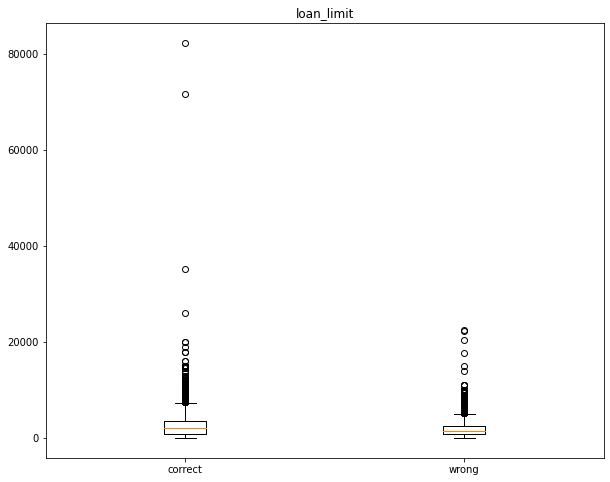

In [ ]:
wl = wrong_df_ap['loan_limit']
cl = correct_df_ap['loan_limit']
plt.figure(figsize=(10,8))
plt.boxplot([cl,wl])
plt.xticks([1,2],['correct','wrong'])
plt.title('loan_limit')
plt.show()
# loan limit같은 경우 큰 차이가 없는 것 같다. 

In [ ]:
wrong_df_ap['gender'].value_counts()/len(wrong_df_ap)

man      0.690016
woman    0.309984
Name: gender, dtype: float64

In [ ]:
correct_df_ap['gender'].value_counts()/len(correct_df_ap)
# gender같은 경우도 유사

man      0.697914
woman    0.302086
Name: gender, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


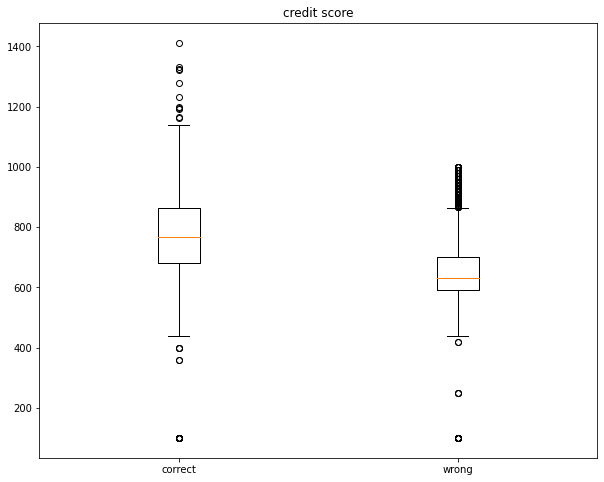

In [ ]:
wl = wrong_df_ap['credit_score']
cl = correct_df_ap['credit_score']
plt.figure(figsize=(10,8))
plt.boxplot([cl,wl])
plt.xticks([1,2],['correct','wrong'])
# plt.xticks([0,4000,8000,12000,16000,20000])
plt.title('credit score')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


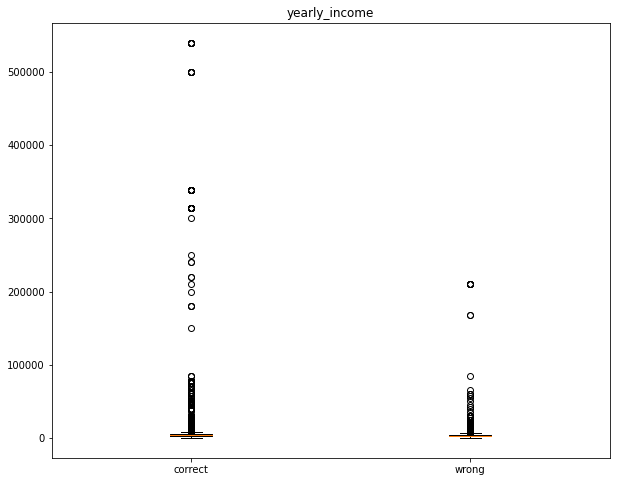

In [ ]:
wl = wrong_df_ap['yearly_income']
cl = correct_df_ap['yearly_income']
plt.figure(figsize=(10,8))
plt.boxplot([cl,wl])
plt.xticks([1,2],['correct','wrong'])
# plt.xticks([0,4000,8000,12000,16000,20000])
plt.title('yearly_income')
plt.show()

In [ ]:
wrong_df_ap['income_type'].value_counts()/len(wrong_df_ap)
#earnedincome2 타입에서 오류가 좀 많이 발생하는 경향이 있다.

EARNEDINCOME       0.664650
EARNEDINCOME2      0.123458
OTHERINCOME        0.075401
PRIVATEBUSINESS    0.064929
FREELANCER         0.056784
PRACTITIONER       0.014778
Name: income_type, dtype: float64

In [ ]:
correct_df_ap['income_type'].value_counts()/len(correct_df_ap)

EARNEDINCOME       0.877526
EARNEDINCOME2      0.033923
PRIVATEBUSINESS    0.031531
OTHERINCOME        0.022526
FREELANCER         0.020473
PRACTITIONER       0.014022
Name: income_type, dtype: float64

In [ ]:
wrong_df_ap['employment_type'].value_counts()/len(wrong_df_ap)
# 기타 타입에서 오류가 좀 많이 발생하는 경향이 있다.

정규직    0.699325
기타     0.181871
계약직    0.102048
일용직    0.016756
Name: employment_type, dtype: float64

In [ ]:
correct_df_ap['employment_type'].value_counts()/len(correct_df_ap)

정규직    0.836907
계약직    0.087490
기타     0.064148
일용직    0.011455
Name: employment_type, dtype: float64

In [ ]:
wrong_df_ap['houseown_type'].value_counts()/len(wrong_df_ap)
# 차이가 크게 없는 것 같다.

전월세       0.452874
기타가족소유    0.339074
자가        0.208052
Name: houseown_type, dtype: float64

In [ ]:
correct_df_ap['houseown_type'].value_counts()/len(correct_df_ap)

전월세       0.453339
자가        0.290700
기타가족소유    0.255926
배우자       0.000035
Name: houseown_type, dtype: float64

In [ ]:
wrong_df_ap['purpose'].value_counts()/len(wrong_df_ap)
# 차이가 크게 없는 것 같다.

LIVING          0.678031
SWITCHLOAN      0.234931
BUSINESS        0.039213
ETC             0.021527
HOUSEDEPOSIT    0.013149
INVEST          0.006865
BUYHOUSE        0.005003
BUYCAR          0.001280
Name: purpose, dtype: float64

In [ ]:
correct_df_ap['purpose'].value_counts()/len(correct_df_ap)

LIVING          0.482980
SWITCHLOAN      0.321054
BUYHOUSE        0.047256
HOUSEDEPOSIT    0.046311
BUSINESS        0.040852
ETC             0.031508
INVEST          0.023704
BUYCAR          0.006334
Name: purpose, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


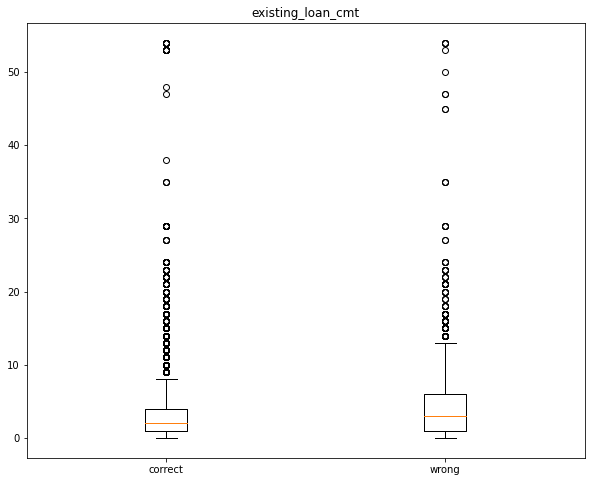

In [ ]:
wl = wrong_df_ap['existing_loan_cnt']
cl = correct_df_ap['existing_loan_cnt']
plt.figure(figsize=(10,8))
plt.boxplot([cl,wl])
plt.xticks([1,2],['correct','wrong'])
# plt.xticks([0,4000,8000,12000,16000,20000])
plt.title('existing_loan_cmt')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


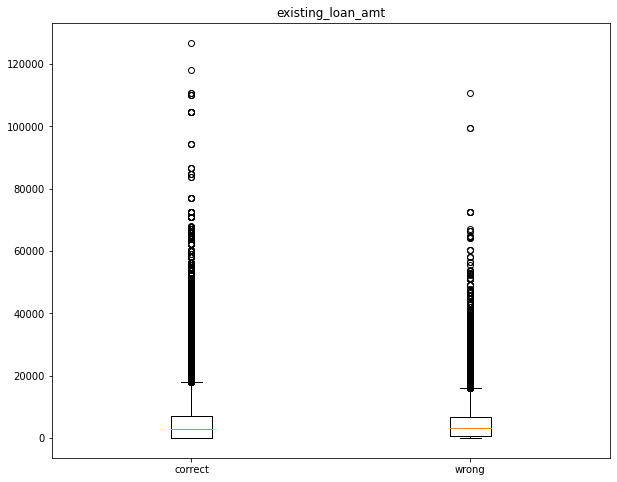

In [ ]:
wl = wrong_df_ap['existing_loan_amt']
cl = correct_df_ap['existing_loan_amt']
plt.figure(figsize=(10,8))
plt.boxplot([cl,wl])
plt.xticks([1,2],['correct','wrong'])
# plt.xticks([0,4000,8000,12000,16000,20000])
plt.title('existing_loan_amt')
plt.show()

In [ ]:
df.columns

Index(['product_id', 'loan_limit', 'is_applied', 'user_id', 'gender',
       'credit_score', 'yearly_income', 'income_type', 'employment_type',
       'houseown_type', 'purpose', 'existing_loan_cnt', 'existing_loan_amt',
       'user_age', 'working month', 'personal_rehab', 'uselm_freq',
       'usepcal_freq', 'login_freq', 'usedcal_freq', 'getcr_freq',
       'sign_month', 'user_interest', 'sign_up', 'time division', 'log_apply',
       'economy1', 'economy2', 'economy3'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


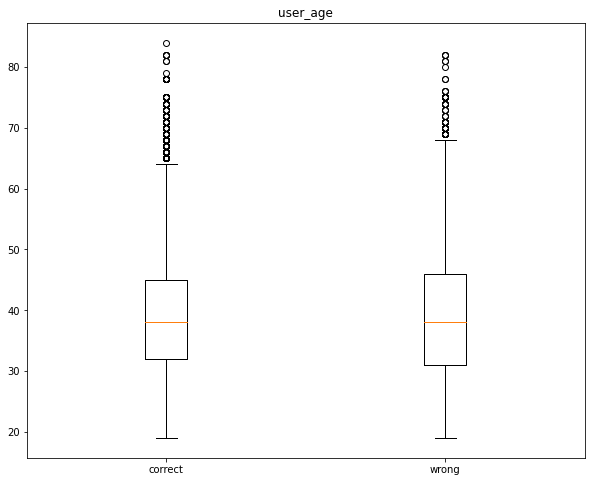

In [ ]:
wl = wrong_df_ap['user_age']
cl = correct_df_ap['user_age']
plt.figure(figsize=(10,8))
plt.boxplot([cl,wl])
plt.xticks([1,2],['correct','wrong'])
# plt.xticks([0,4000,8000,12000,16000,20000])
plt.title('user_age')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


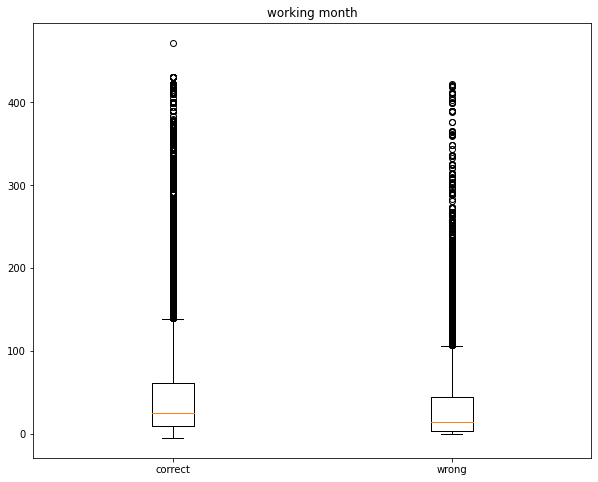

In [ ]:
wl = wrong_df_ap['working month']
cl = correct_df_ap['working month']
plt.figure(figsize=(10,8))
plt.boxplot([cl,wl])
plt.xticks([1,2],['correct','wrong'])
# plt.xticks([0,4000,8000,12000,16000,20000])
plt.title('working month')
plt.show()

In [ ]:
wrong_df_ap['personal_rehab'].value_counts()/len(wrong_df_ap)
# 차이가 크게 없는 것 같다.

unknown    0.892134
D          0.103328
B          0.002909
A          0.001629
Name: personal_rehab, dtype: float64

In [ ]:
correct_df_ap['personal_rehab'].value_counts()/len(correct_df_ap)

unknown    0.892469
D          0.105863
B          0.001283
A          0.000385
Name: personal_rehab, dtype: float64

In [ ]:
wrong_df_ap['sign_month'].value_counts()/len(wrong_df_ap)
# 차이가 크게 없는 것 같다.

unsinged    0.931231
4           0.026297
5           0.023039
3           0.019432
Name: sign_month, dtype: float64

In [ ]:
correct_df_ap['sign_month'].value_counts()/len(correct_df_ap)

unsinged    0.959405
4           0.017918
3           0.012587
5           0.010091
Name: sign_month, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


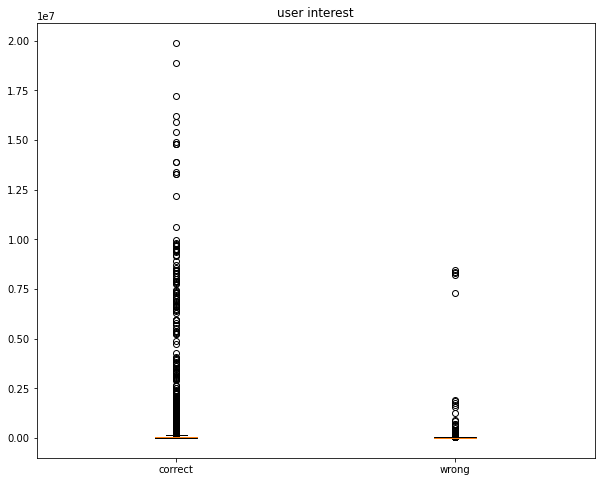

In [ ]:
wl = wrong_df_ap['user_interest']
cl = correct_df_ap['user_interest']
plt.figure(figsize=(10,8))
plt.boxplot([cl,wl])
plt.xticks([1,2],['correct','wrong'])
# plt.xticks([0,4000,8000,12000,16000,20000])
plt.title('user interest')
plt.show()
# 이건 좀 차이가 있을 수 있겠다  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498985 entries, 0 to 498984
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   product_id         498985 non-null  object 
 1   loan_limit         498985 non-null  float64
 2   is_applied         498985 non-null  float64
 3   user_id            498985 non-null  object 
 4   gender             498985 non-null  object 
 5   credit_score       498985 non-null  float64
 6   yearly_income      498985 non-null  float64
 7   income_type        498985 non-null  object 
 8   employment_type    498985 non-null  object 
 9   houseown_type      498985 non-null  object 
 10  purpose            498985 non-null  object 
 11  existing_loan_cnt  498985 non-null  float64
 12  existing_loan_amt  498985 non-null  float64
 13  user_age           498985 non-null  float64
 14  working month      498985 non-null  int64  
 15  personal_rehab     498985 non-null  object 
 16  us

In [ ]:
wrong_df_ap['sign_up'].value_counts()/len(wrong_df_ap)

0    0.931231
1    0.068769
Name: sign_up, dtype: float64

In [ ]:
correct_df_ap['sign_up'].value_counts()/len(correct_df_ap)

0    0.959405
1    0.040595
Name: sign_up, dtype: float64

In [ ]:
wrong_df_ap['time division'].value_counts()/len(wrong_df_ap)

noon       0.579590
morning    0.158134
dinner     0.135211
dawn       0.080754
night      0.046311
Name: time division, dtype: float64

In [ ]:
correct_df_ap['time division'].value_counts()/len(correct_df_ap)

noon       0.549426
dinner     0.170419
morning    0.149316
dawn       0.068779
night      0.062060
Name: time division, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


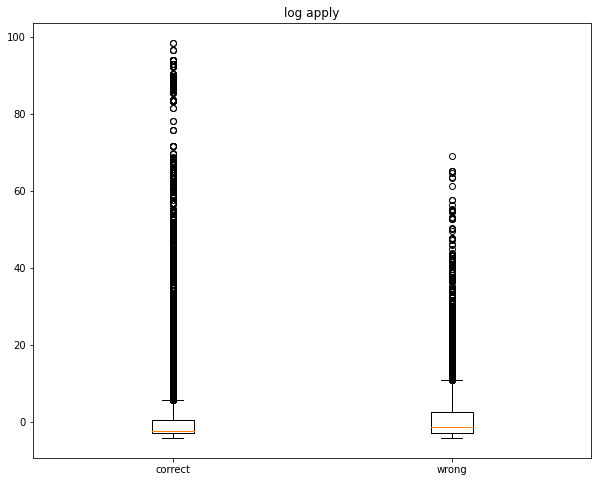

In [ ]:
wl = wrong_df_ap['log_apply']
cl = correct_df_ap['log_apply']
plt.figure(figsize=(10,8))
plt.boxplot([cl,wl])
plt.xticks([1,2],['correct','wrong'])
# plt.xticks([0,4000,8000,12000,16000,20000])
plt.title('log apply')
plt.show()